# The question is: predict the median house value

Linear Regression For Price Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set_option to format our numeric values
pd.set_option('display.precision',2) # precison mean the numbers after the dicemal number

# reset all options, *** ignore the warning that may appear ***
#pd.reset_option('all')

housing_data=pd.read_csv('housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1018,-121.79,37.67,26.0,2163.0,339.0,947.0,346.0,6.08,211000.0,INLAND
5460,-118.47,34.00,37.0,2586.0,765.0,1801.0,737.0,2.60,305800.0,<1H OCEAN
26,-122.28,37.85,49.0,1130.0,244.0,607.0,239.0,2.46,93800.0,NEAR BAY
14127,-117.09,32.75,24.0,1245.0,376.0,1230.0,362.0,1.88,95000.0,NEAR OCEAN
12246,-116.96,33.74,19.0,3649.0,755.0,1717.0,696.0,2.21,87600.0,INLAND


# Data preparation

In [4]:
housing_data.shape

(20640, 10)

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# drop or fix null values, here wil just drop all rows with nulls
housing_data=housing_data.dropna()
housing_data.shape

(20433, 10)

In [7]:
# check to see if this field is a categorical field
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
# convert the categorical columns to numeric data, this will add 4 new columns and remove the orignal column
housing_data=pd.get_dummies(housing_data,columns=['ocean_proximity'])
housing_data.shape

(20433, 14)

In [9]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.33,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.30,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.26,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.85,342200.0,0,0,0,1,0


[Text(0, 0, 'longitude'),
 Text(1, 0, 'latitude'),
 Text(2, 0, 'housing_median_age'),
 Text(3, 0, 'total_rooms'),
 Text(4, 0, 'total_bedrooms'),
 Text(5, 0, 'population'),
 Text(6, 0, 'households'),
 Text(7, 0, 'median_income'),
 Text(8, 0, 'median_house_value'),
 Text(9, 0, 'ocean_proximity_<1H OCEAN'),
 Text(10, 0, 'ocean_proximity_INLAND'),
 Text(11, 0, 'ocean_proximity_ISLAND'),
 Text(12, 0, 'ocean_proximity_NEAR BAY'),
 Text(13, 0, 'ocean_proximity_NEAR OCEAN')]

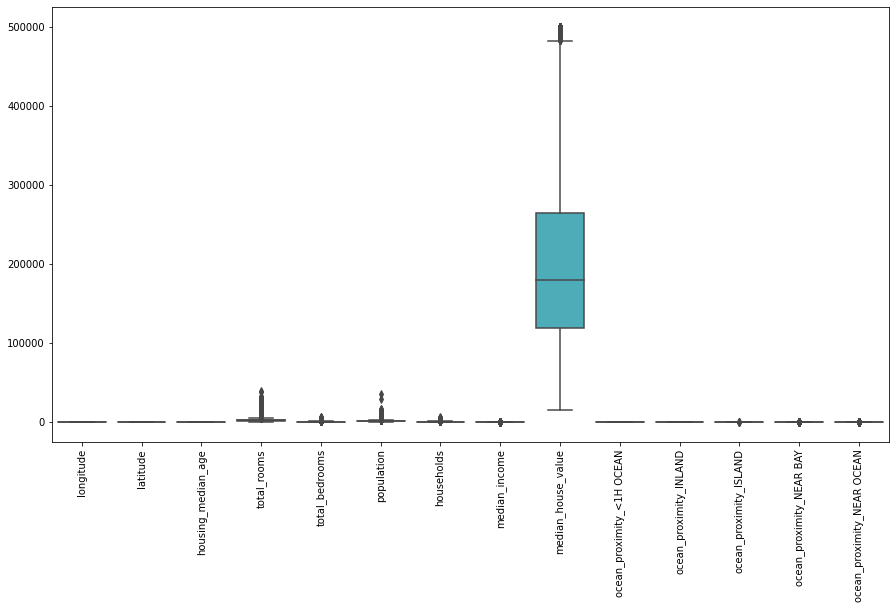

In [10]:
#we need to find out if there is any outliers i our data
# will draw boxplot for all columns
fig,ax=plt.subplots(figsize=(15,8))
bp=sns.boxplot(data=housing_data)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90) # label rotation 

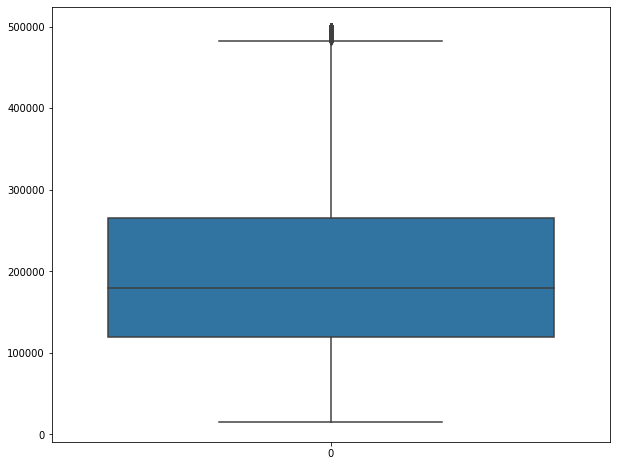

In [11]:
# will draw boxplot for all columns
fig,ax=plt.subplots(figsize=(10,8))
bp=sns.boxplot(data=housing_data['median_house_value'])

In [12]:
# now we need to find out the max of 'median_house_value' to remove the outliers
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,2.04e+04,20433.00,20433.00
mean,-119.57,35.63,28.63,2636.50,537.87,1424.95,499.43,3.87,206864.41,0.44,0.32,2.45e-04,0.11,0.13
std,2.00,2.14,12.59,2185.27,421.39,1133.21,382.30,1.90,115435.67,0.50,0.47,1.56e-02,0.31,0.33
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00,0.00,0.00,0.00e+00,0.00,0.00
25%,-121.80,33.93,18.00,1450.00,296.00,787.00,280.00,2.56,119500.00,0.00,0.00,0.00e+00,0.00,0.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.54,179700.00,0.00,0.00,0.00e+00,0.00,0.00
75%,-118.01,37.72,37.00,3143.00,647.00,1722.00,604.00,4.74,264700.00,1.00,1.00,0.00e+00,0.00,0.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00,1.00,1.00,1.00e+00,1.00,1.00


In [13]:
# filter the data using loc and get the count
housing_data.loc[housing_data['median_house_value']==500001].count()
# 958 rows of data could skewness يحرف our training model result, so it is better to drop

longitude                     958
latitude                      958
housing_median_age            958
total_rooms                   958
total_bedrooms                958
population                    958
households                    958
median_income                 958
median_house_value            958
ocean_proximity_<1H OCEAN     958
ocean_proximity_INLAND        958
ocean_proximity_ISLAND        958
ocean_proximity_NEAR BAY      958
ocean_proximity_NEAR OCEAN    958
dtype: int64

In [14]:
# housing_data.drop(rows or columns indexies)
housing_data=housing_data.drop(housing_data.loc[housing_data['median_house_value']==500001].index)
housing_data.shape

(19475, 14)

In [15]:
# now we need to get two sets of data 
# x for train (features) and y for prediction (target)
# since we need to predict the median_house_value, so we need to drop it from our train data
X=housing_data.drop('median_house_value',axis=1) # axis=0 => rows and axis=1 => columns 
Y=housing_data['median_house_value']

In [16]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

# Train our model -spliting data

In [17]:
# we use the train data to train our model, and later will use the test data to measure the performance of ML model.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [18]:
x_train.shape,x_test.shape

((15580, 13), (3895, 13))

In [19]:
y_train.shape,y_test.shape

((15580,), (3895,))

Normalization scales all numersic features to be between 0 and 1.

Note: Having features in the same scale can vastly improve the performance of your ML model.

fit=Fit the linear model on the training data i.e. train the linear model using our features and target values.

In [20]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(normalize=True).fit(x_train,y_train)

# evaluation for training score

In [21]:
#print the evaluation score (R-square ) , 
# this shown how well our linear model capture the underlying variation in our training data
print("Training_score :",linear_model.score(x_train,y_train))
#0.6144045851306654 it is not fantastic but not bad

Training_score : 0.6129260115752351


In [22]:
predictors=x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [23]:
# the coef is the facter that effect our prediction
# nagative values will lower the price
# we can indecate that the most expensive houses these located in on island
coef=pd.Series(linear_model.coef_,predictors).sort_values()
print(coef)

longitude                    -2.39e+04
latitude                     -2.19e+04
population                   -3.00e+01
total_rooms                  -7.93e+00
households                    4.66e+01
total_bedrooms                9.15e+01
housing_median_age            9.08e+02
median_income                 3.85e+04
ocean_proximity_INLAND        1.17e+17
ocean_proximity_NEAR BAY      1.17e+17
ocean_proximity_<1H OCEAN     1.17e+17
ocean_proximity_NEAR OCEAN    1.17e+17
ocean_proximity_ISLAND        1.17e+17
dtype: float64


In [24]:
# let us predict using the x_test 
y_pred=linear_model.predict(x_test)

In [25]:
# to take a look on our model prediction using our eyes 
#we want to compare between our actual data and predicted data
df_pred_actual=pd.DataFrame({'predicted':y_pred,'actual':y_test})
df_pred_actual.head(10)

,predicted,actual
15821,223088.0,262500.0
16022,360640.0,394100.0
19983,59216.0,54400.0
6951,180496.0,163300.0
16825,229440.0,254100.0
12428,45552.0,100000.0
13523,129504.0,122200.0
12778,75488.0,58500.0
7276,123776.0,100300.0
14341,224352.0,466700.0


# evaluation for test score
##### the best way to calculate the evaluate a model is to calculate an R-squared score (r2_score) on your test data

In [26]:
from sklearn.metrics import r2_score
print('Testing_score :',r2_score(y_test,y_pred)) 
# we can see here that our test score almost same as our Training_score : 0.6164414963791895

Testing_score : 0.6128240315911189


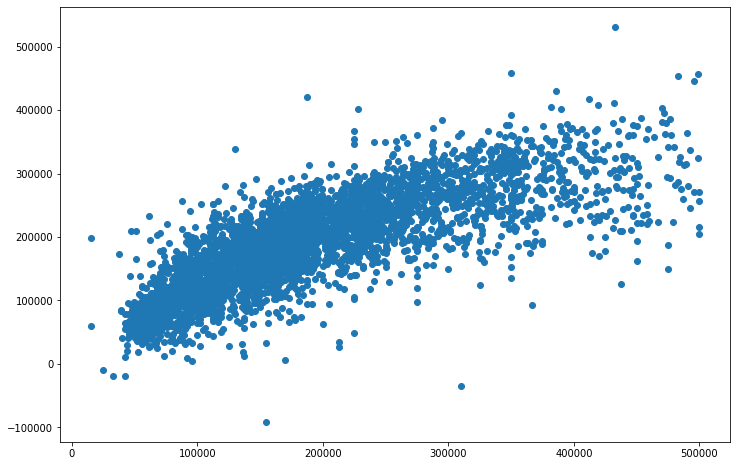

In [27]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.show()

In [28]:
# we want to take a sample of 100 rows and plot
df_pred_actual_sample=df_pred_actual.sample(100)
df_pred_actual_sample=df_pred_actual_sample.reset_index()
df_pred_actual_sample.head()

,index,predicted,actual
0,15363,275696.0,331300.0
1,17535,247712.0,199000.0
2,3204,148896.0,90600.0
3,1845,339008.0,333700.0
4,19931,185840.0,113000.0


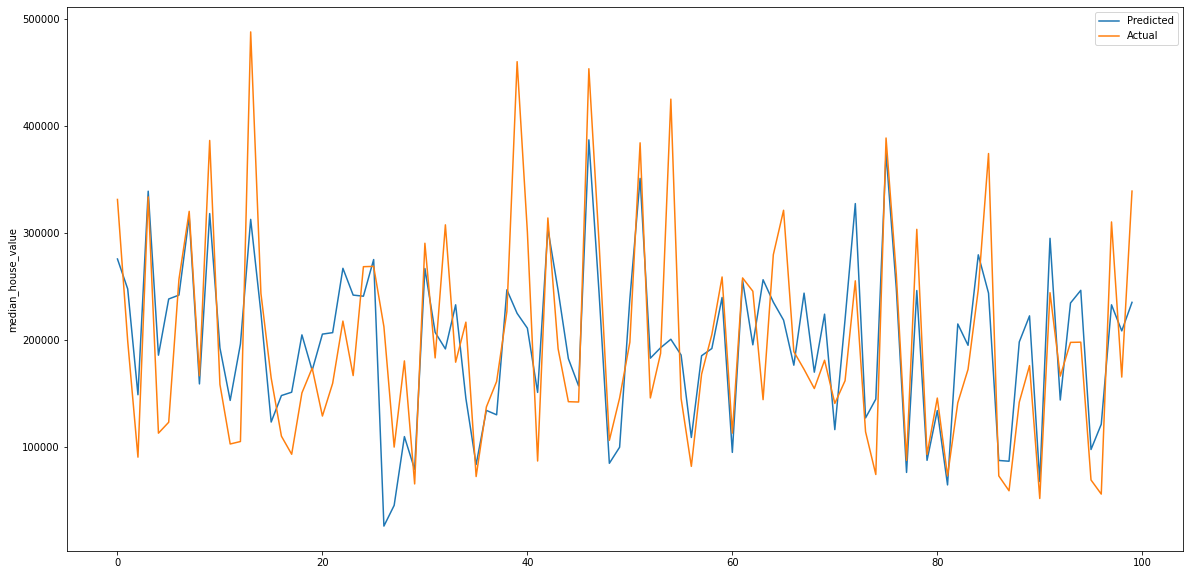

In [29]:
# we plot our sample data (100 rows), comparing between actual and predicted data
plt.figure(figsize=(20,10))
plt.plot(df_pred_actual_sample['predicted'],label='Predicted')
plt.plot(df_pred_actual_sample['actual'],label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()
#notice: Predicted is blue and Actual is orange